In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
df = pd.read_csv("housePrice.csv")

In [11]:
df.head()

,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
0,1,143.635030,1,3,3,1967,1,1,48,8.297631,5.935734,602134.816747
1,2,287.678577,1,2,1,1949,0,1,37,6.061466,10.827392,591425.135386
2,3,232.998485,1,3,2,1923,1,0,14,2.911442,6.904599,464478.696880
3,4,199.664621,5,2,2,1918,0,0,17,2.070949,8.284019,583105.655996
4,5,89.004660,4,3,3,1999,1,0,34,1.523278,14.648277,619879.142523


In [12]:
df.shape

(500, 12)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  500 non-null    int64  
 1   Square_Feet         500 non-null    float64
 2   Num_Bedrooms        500 non-null    int64  
 3   Num_Bathrooms       500 non-null    int64  
 4   Num_Floors          500 non-null    int64  
 5   Year_Built          500 non-null    int64  
 6   Has_Garden          500 non-null    int64  
 7   Has_Pool            500 non-null    int64  
 8   Garage_Size         500 non-null    int64  
 9   Location_Score      500 non-null    float64
 10  Distance_to_Center  500 non-null    float64
 11  Price               500 non-null    float64
dtypes: float64(4), int64(8)
memory usage: 47.0 KB


In [14]:
df.describe()

,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,174.640428,2.958000,1.976000,1.964000,1957.604000,0.536000,0.492000,30.174000,5.164410,10.469641,582209.629529
std,144.481833,74.672102,1.440968,0.820225,0.802491,35.491781,0.499202,0.500437,11.582575,2.853489,5.588197,122273.390345
min,1.000000,51.265396,1.000000,1.000000,1.000000,1900.000000,0.000000,0.000000,10.000000,0.004428,0.062818,276892.470136
25%,125.750000,110.319923,2.000000,1.000000,1.000000,1926.000000,0.000000,0.000000,20.000000,2.760650,6.066754,503080.344140
50%,250.500000,178.290937,3.000000,2.000000,2.000000,1959.000000,1.000000,0.000000,30.000000,5.206518,10.886066,574724.113347
75%,375.250000,239.031220,4.000000,3.000000,3.000000,1988.000000,1.000000,1.000000,41.000000,7.732933,15.072590,665942.301274
max,500.000000,298.241199,5.000000,3.000000,3.000000,2022.000000,1.000000,1.000000,49.000000,9.995439,19.927966,960678.274291


In [15]:
df.isnull().sum()

ID                    0
Square_Feet           0
Num_Bedrooms          0
Num_Bathrooms         0
Num_Floors            0
Year_Built            0
Has_Garden            0
Has_Pool              0
Garage_Size           0
Location_Score        0
Distance_to_Center    0
Price                 0
dtype: int64

In [17]:
df.drop("ID", axis=1, inplace=True)

In [19]:
df.isnull().sum()

Square_Feet           0
Num_Bedrooms          0
Num_Bathrooms         0
Num_Floors            0
Year_Built            0
Has_Garden            0
Has_Pool              0
Garage_Size           0
Location_Score        0
Distance_to_Center    0
Price                 0
dtype: int64

In [20]:
# dependent and independent features
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [21]:
X.head()

,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center
0,143.635030,1,3,3,1967,1,1,48,8.297631,5.935734
1,287.678577,1,2,1,1949,0,1,37,6.061466,10.827392
2,232.998485,1,3,2,1923,1,0,14,2.911442,6.904599
3,199.664621,5,2,2,1918,0,0,17,2.070949,8.284019
4,89.004660,4,3,3,1999,1,0,34,1.523278,14.648277


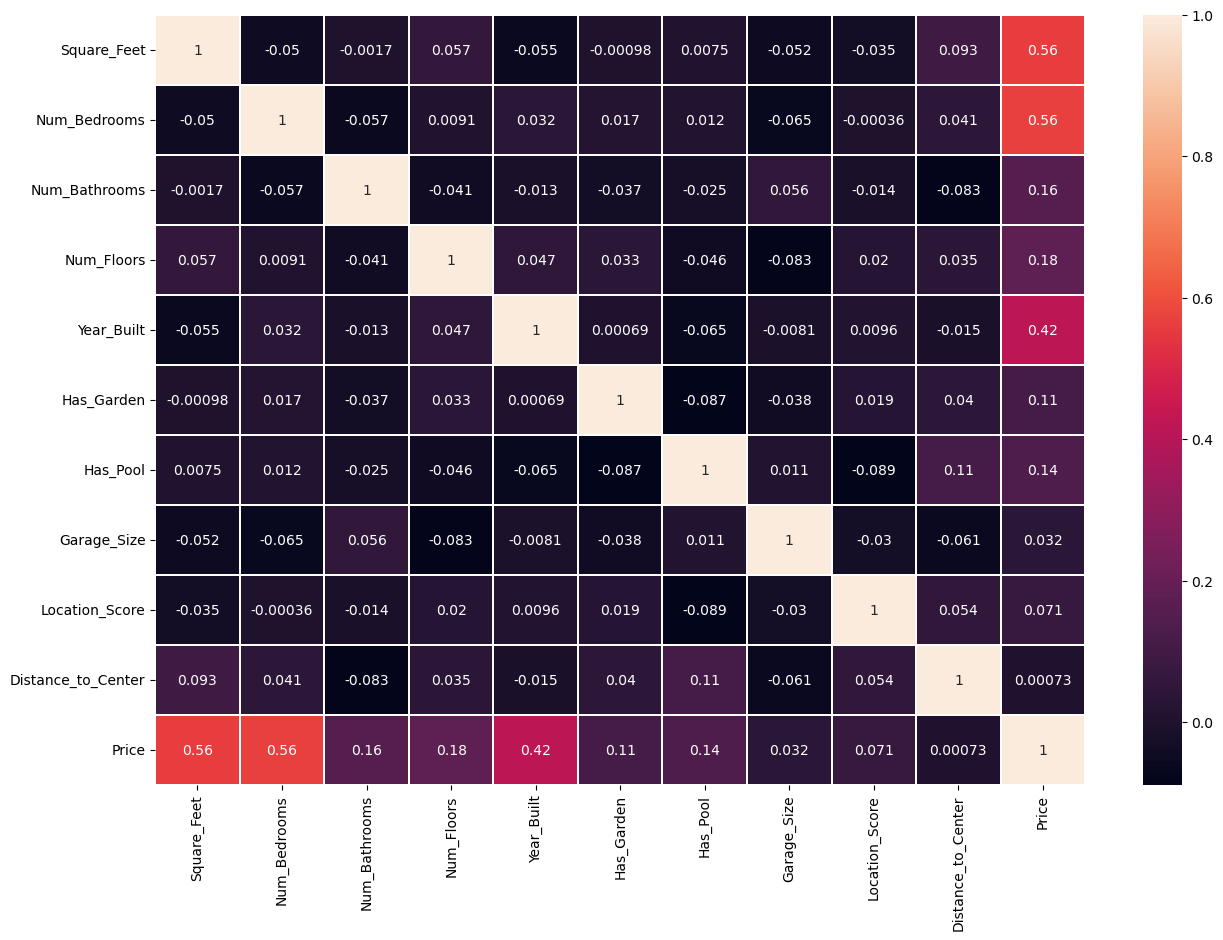

In [49]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, linewidths=0.2)
plt.show()

In [26]:
y.head()

0    602134.816747
1    591425.135386
2    464478.696880
3    583105.655996
4    619879.142523
Name: Price, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
X_test_scaled

array([[-1.48705187,  0.7710996 ,  1.2021147 ,  0.02500782, -0.77066599,
         0.90911166,  0.98511083,  1.28002384,  0.06817687,  1.34230462],
       [ 1.4113564 ,  0.07009996, -1.2511806 ,  0.02500782, -0.99704117,
        -1.09997489,  0.98511083, -0.5346935 , -0.22431332,  1.28540461],
       [ 1.02882984,  0.7710996 , -1.2511806 , -1.22538299, -1.30830703,
        -1.09997489,  0.98511083,  1.10719362,  1.53961594,  1.43568985],
       [-1.11960305, -1.33189931,  1.2021147 , -1.22538299,  1.2667106 ,
         0.90911166, -1.01511421, -0.01620283,  1.66149466,  0.30652402],
       [ 0.45993615,  1.47209924,  1.2021147 ,  0.02500782,  1.1818199 ,
         0.90911166,  0.98511083,  1.0207785 ,  1.03634999,  1.43906143],
       [ 0.73335294,  0.7710996 , -0.02453295,  1.27539862, -0.96874427,
         0.90911166, -1.01511421, -0.44827839, -1.39393794,  0.40716622],
       [ 0.34955245, -0.63089967, -1.2511806 ,  1.27539862,  1.66286715,
        -1.09997489,  0.98511083, -1.57167484

In [30]:
X_train_scaled

array([[-1.40633466, -1.33189931, -0.02453295, ..., -0.79393884,
         1.26330602, -0.72822016],
       [-0.96267899, -1.33189931, -0.02453295, ...,  1.28002384,
         1.22788619, -0.72841887],
       [ 0.79562613,  0.07009996, -0.02453295, ...,  1.19360873,
         0.0637733 , -1.53645662],
       ...,
       [ 1.19559746,  1.47209924,  1.2021147 , ...,  0.76153317,
         1.36427346,  0.76139253],
       [ 1.43326609,  0.07009996, -0.02453295, ...,  0.41587272,
         0.84937848, -1.726809  ],
       [-1.68426866,  1.47209924, -1.2511806 , ...,  1.28002384,
         0.78644682,  0.63885446]])

In [35]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
linear = LinearRegression()
linear.fit(X_train_scaled, y_train)

LinearRegression()

Mean Absolute Error:  16035.518322271513
Mean Squared Error:  394745872.34219337
R2 Score:  0.9739971004112669


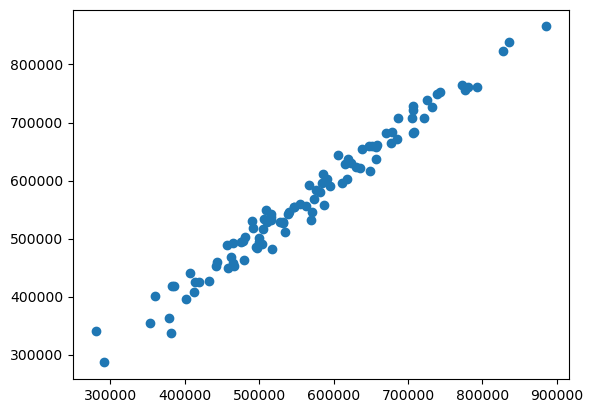

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = linear.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("R2 Score: ", score)
plt.scatter(y_test, y_pred)
plt.show()

Mean Absolute Error:  16035.606034132918
Mean Squared Error:  394763457.9698394
R2 Score:  0.9739959420019156


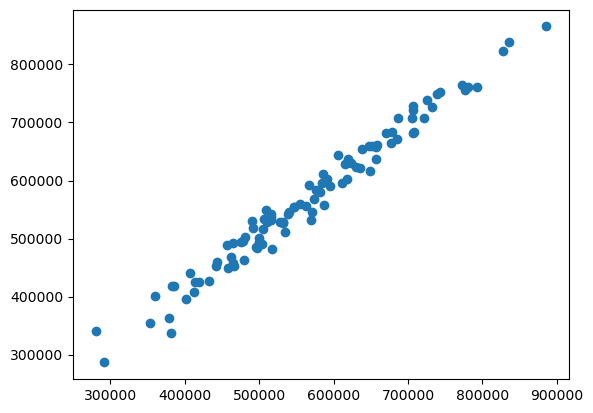

In [37]:
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("R2 Score: ", score)
plt.scatter(y_test, y_pred)
plt.show()

Mean Absolute Error:  16045.20729309522
Mean Squared Error:  396902126.76347995
R2 Score:  0.9738550625303594


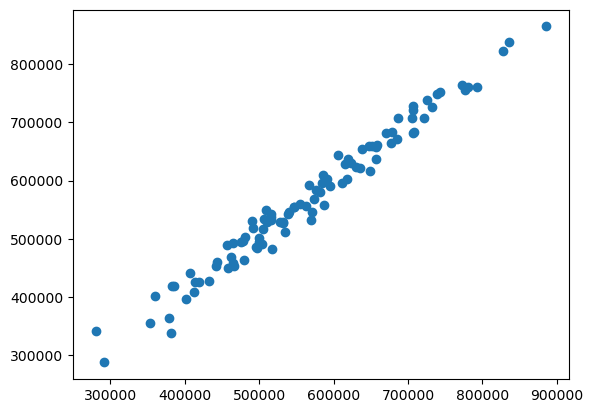

In [38]:
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("R2 Score: ", score)
plt.scatter(y_test, y_pred)
plt.show()

Mean Absolute Error:  40605.14106020558
Mean Squared Error:  2495966366.4024644
R2 Score:  0.835584442169527


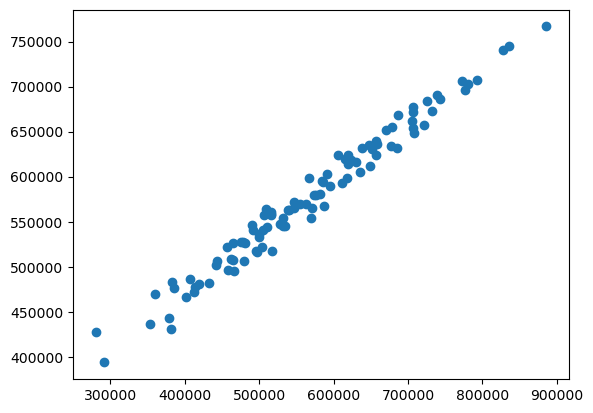

In [39]:
elastic = ElasticNet()
elastic.fit(X_train_scaled, y_train)
y_pred = elastic.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("R2 Score: ", score)
plt.scatter(y_test, y_pred)
plt.show()

Mean Absolute Error:  16041.72244292096
Mean Squared Error:  396044187.9717401
R2 Score:  0.9739115771080104


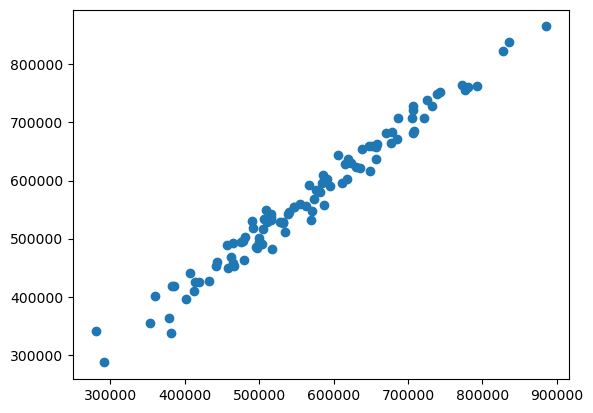

In [40]:
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled, y_train)
y_pred = lassocv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("R2 Score: ", score)
plt.scatter(y_test, y_pred)
plt.show()

Mean Absolute Error:  16036.489627482188
Mean Squared Error:  394951874.30248433
R2 Score:  0.9739835305460349


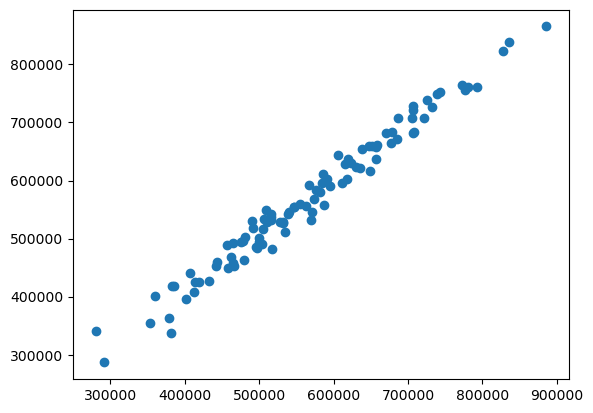

In [41]:
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled, y_train)
y_pred = ridgecv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("R2 Score: ", score)
plt.scatter(y_test, y_pred)
plt.show()

Mean Absolute Error:  101230.61510416852
Mean Squared Error:  15191373326.09384
R2 Score:  -0.0006938207347395586


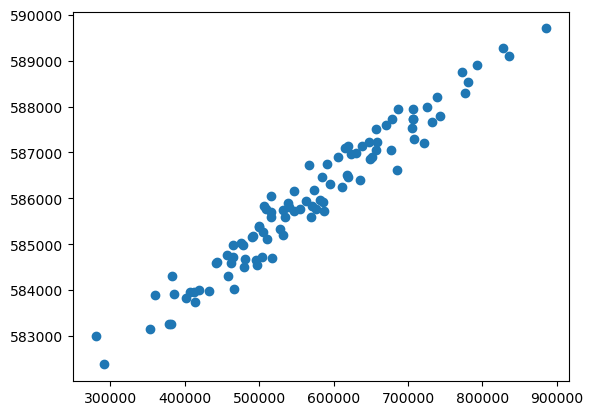

In [50]:
elasticnetcv = ElasticNetCV(cv=5)
elasticnetcv.fit(X_train_scaled, y_train)
y_pred = elasticnetcv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("R2 Score: ", score)
plt.scatter(y_test, y_pred)
plt.show()